<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

Привет! Меня зовут Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные и отмечены **#ок** - всё сделано правильно; жёлтые и отмечены **#можно лучше** - есть замечания, но не критично; красные с пометкой **#ошибка** - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.
    
Я буду поддерживать версионность комментариев, и при следующих итерациях комментарии будут выделены, как "Комментраии ревьюера - 2 (3 и.т.д.)"
    
Если у тебя есть замечания, возражения и вопросы, ты можешь писать свои комментарии, по возможности выделяй их так же цветом (например, синим), чтоб их можно было легко отделить от текста проекта. 
    
Кстати, предлагаю сразу общаться на "ты".
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: </b>   
    
    Вера, большое спасибо за подробный разбор проекта. Надеюсь, я исправила все неточности.   
И у меня есть вопрос: чем процентиль отличается от квантиля. В теории давали процентили. Пыталась гуглить, но потерялась в математических терминах.</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

Перцентиль - это любой процент, например 90% перцентиль или 70% перцентиль. А квантиль - это 25%, 50% и 75% соответственно первый, второй и третий квантиль. Но сами слова часто путают. Можно услышать и про 90% квантиль (хотя вообще это не верно)

</div>

**Описание проекта**  
Контекст  
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.  

**Часть 1. Приоритизация гипотез.**
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  


**Часть 2. Анализ A/B-теста**  
Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.
**Задача**  
Проанализируйте A/B-тест:  
1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  
2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  
3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения. 
4.	Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.  
5.	Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.  
6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.  
7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  
8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.  
9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  
10.	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.  
11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  
12.	Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.  
13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  
14.	Примите решение по результатам теста и объясните его. Варианты решений:  
  1. Остановить тест, зафиксировать победу одной из групп.   
  2. Остановить тест, зафиксировать отсутствие различий между группами.   
  3. Продолжить тест.  


### Часть 1. Приоритизация гипотез. 

**Данные для первой части**  

Файл /datasets/hypothesis.csv. Содержит данные:   

•	Hypothesis — краткое описание гипотезы;  
•	Reach — охват пользователей по 10-балльной шкале;  
•	Impact — влияние на пользователей по 10-балльной шкале;  
•	Confidence — уверенность в гипотезе по 10-балльной шкале;  
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже 

#### 1. Откроем файлы, импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import math
from scipy import stats

from datetime import timedelta
import datetime as dt

from statsmodels.stats.proportion import proportions_ztest
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Подгрузим датасет
data = pd.read_csv('/datasets/hypothesis.csv')  # гипотезы
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 130 

display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем названия столбцов к нижнему регистру

In [3]:
data.columns = [x.lower() for x in data.columns.values]
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### 2. Оценим параметр ICE для приоритизации гипотез

In [4]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
#  отсортируем гипотезы  по убыванию приоритета:  
data[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


#### 3. Применим фреймворк RICE для приоритизации гипотез. 

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

# Отсортируем гипотезы по убыванию приоритета: 
data[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


In [6]:
# data[['hypothesis', 'ICE', 'RICE']]
data[['hypothesis', 'ICE', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.00


<div class="alert alert-info"> <b>Комментарий студента:</b> Исправлено.</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

**4. Вывод по части 1**

Наиболее перспективные гипотезы по методу ICE 8-0-7:    
* Запустить акцию, дающую скидку на товар в день рождения  
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассыло 

На первом месте гипотеза с индексом 8: "Запустить акцию, дающую скидку на товар в день рождения". Так получилось, потому что у нее высокие Impact и Confidence. 

Наиболее перспективные гипотезы по методу RICE 7-2-0: 
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей  

На первое место вышла гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что ее параметр reach равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.

Итого у нас в двух методах получилось 2 общие гипотезы: 0 и 7: "Добавить форму подписки" и "Добавить два новых канала". Но их место в приоритезации отличается. Первое место у методов разное.  

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Ключевые гипотезы указаны правильно

</div>

### Часть 2. Анализ A/B-теста

У нас два датасета.  

Файл /datasets/оrders.csv содержит данные: 

• transactionId — идентификатор заказа;  
• visitorId — идентификатор пользователя, совершившего заказ;  
• date — дата, когда был совершён заказ;  
• revenue — выручка заказа;  
• group — группа A/B-теста, в которую попал заказ.  


Файл /datasets/visitors.csv. одержит данные: 

• date — дата;  
• group — группа A/B-теста;  
• visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

Проведем предобработку данных. 

In [7]:
# Подгрузим данные orders  
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head());
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Файл orders содержит 5 столбцов и 1197 строк. Пропущенных значений нет. Тип колонки date приведем к datetime.

In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.columns = ['orderId','userId','date', 'revenue','group']

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Файл orders содержит 3 столбца и 62 строк. Пропущенных значений нет. Тип колонки date приведем к datetime.

In [11]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Определим количество пользователей в каждой группе

In [12]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Итого, в группу B попало на 83 пользователя больше. Проверим корректность разбиения на группы: есть ли пользователи, попавшие в обе группы:

In [13]:
dubble_users = orders.pivot_table(index='userId', values='group', aggfunc='nunique').reset_index()
dubble_users.columns = ['userId','group']
dubble_users = dubble_users.query('group > 1')
display(dubble_users.query('group > 1').count())

userId    58
group     58
dtype: int64

У нас 58 пользователей находятся в обоих группах. Если удалить этих пользователей из таблицы orders, это может повлиять на конверсию, так как количество пользователей, сделавших заказ уменьшиться. В то же время количество посетителей в visitors останется прежним.   

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Да, все верно, есть серьезные основания не доверять тесту.

Само наличие пересечений групп - это уже проблема, плюс мы действительно не можем вычленить пользователей и удалить их данные, т.к. таблица посещений уже агрегирована

</div>

**Вывод**
Мы загрузили датафреймы и подготовили данные для анализа.

В датафреймах  orders и visits привели колонку date к типу datetime. 
Определили, что у нас неравное число участников: в группе А - 557 человек, в группе B - 640.

Нашли и удалили 58 пользователей, которые присуствуют в обоих группах.

#### 1. График кумулятивной выручки по группам.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [14]:
# создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах 

Объявим переменную ordersAggregated, содержащую: дату; группу A/B-теста; число уникальных заказов в группе теста; число уникальных пользователей, совершивших хотя бы 1 заказ; суммарную выручку заказов в группе теста.

In [15]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'orderId' : 'nunique', 'userId' : 'nunique', 'revenue' : 'sum'})
    , axis=1).sort_values(by=['date','group']) 

In [16]:
ordersAggregated.head()

,date,group,orderId,userId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина visitorsAggregated, содержащие: дату; группу A/B-теста; количество уникальных посетителей в группе теста по указанную дату включительно.

In [17]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'})
    , axis=1).sort_values(by=['date','group']) 

In [18]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим обе таблицы в одну таблицу cumulativeData по колонкам 'date', 'group' методом merge()

In [19]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [21]:
display(cumulativeRevenueA.head())
display(cumulativeRevenueB.head())

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


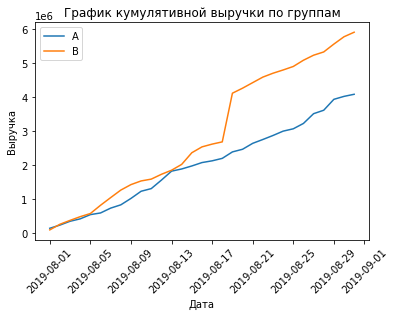

In [22]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.legend() 
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show();

Выручка в группе А равномерно увеличивается в течение всего теста. Выручка в группе B делает резкий скачок 18 августа  - похоже на выброс. Это может говорить о о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Хорошо, все верно построено и описано

</div>

#### 2. График кумулятивного среднего чека по группам. 

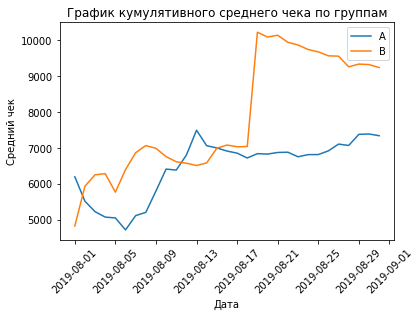

In [23]:
# Разделим кумулятивную выручку на кумулятивное число заказов:

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show();

Значение среднего чека не равномерно и в начале и в конце теста: для группы А значение немного выровнялось после резкого падения в начале и такого же резкого отскока в середине теста. А значение среднего чека группы B после нескольких резких всплесков пока не стремится к выравниванию. Возможно, в группу B попали крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.
Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов.

#### 3. График относительного различия для среднего чека группы B к группе A. 

Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() и сохраним их в переменной mergedCumulativeRevenue.

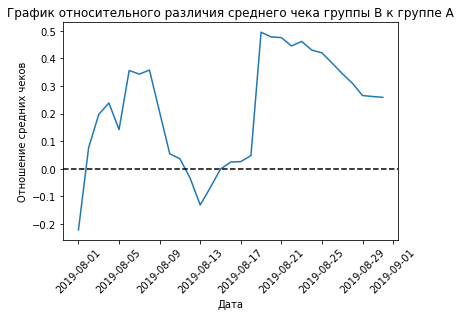

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X Добавим горизонтальную ось методом axhline()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного различия среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.show();


В нескольких точках график различия между сегментами резко «скачет». Вероятно, в эти дни были соверешены большие заказы.

#### 4. График кумулятивной конверсии по группам

Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y

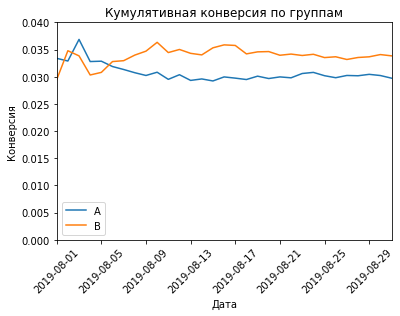

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам")
plt.xlabel('Дата')
plt.ylabel('Конверсия')
 
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.04])

plt.show()


В начале теста сегмент А имел конверсию больше B и был в районе 0,032, но быстро начал падать и выровнялся до уровня 0.027. Сегмент B наоборот начал с 0.25, затем поднялся и к концу месяца оказался на значении 0.031. Как видим, расхождение конверсии не слишком большое - в районе 3-4 %. В обоих группах конверсия зафиксировалась около своего среднего значения.

#### 5. График относительного изменения кумулятивной конверсии группы B к группе A.

Создадим переменную CumulativeConversions, объединив таблицы cumulativeDataA и cumulativeDataB методом merge()

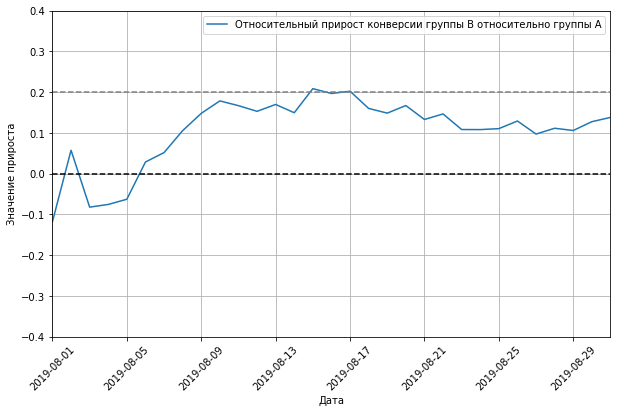

In [26]:
CumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,6))
plt.plot(CumulativeConversions['date'], CumulativeConversions['conversionB']/CumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Значение прироста')
plt.xticks(rotation=45)
plt.grid()
# Добавим пунктирную линию оси X чёрного цвета методом plt.axhline() со значением оси Y = 0 
plt.axhline(y=0, color='black', linestyle='--')
# Добавим еще одну пунктирную линию оси X серого цвета со значением оси Y = 0.2.
plt.axhline(y=0.2, color='grey', linestyle='--')
 
# Задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.4, 0.4])

plt.show()


В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Все графики верно построены. Правильно, что ты сделала заголовки, подписи осей и легенды. Так графики удобно будет использовать в любом отчете или презентации. Так же в данном случае удобно сделать сетку на графиках, она улучшает считываемость.
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавила сетку.</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

Отлично, это для всех графиков выше тоже полезно 

</div>

#### 6. График количества заказов по пользователям.

Найдем возможные аномалии, значения которых способны внести в выборку погрешность и исказить результаты A/B-теста. 
Изучим данные о заказах. 

Найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: 'userId' и 'orders'. Назовем его ordersByUsers.

In [27]:
ordersByUsers = (orders.groupby('userId', as_index=False).agg({'orderId': 'nunique'}))
ordersByUsers.columns = ['userId', 'orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 11, 9, 8 и 5 заказов. 
Построим гистрограмму распределения количества заказов на одного пользователя.

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

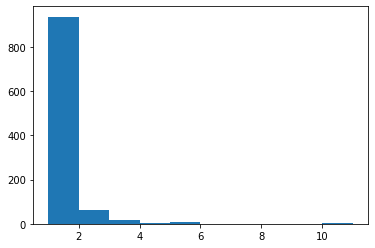

In [28]:
plt.hist(ordersByUsers['orders'])

Большинство покупателей заказывали только один раз. Однако есть доля пользователей с 2-4 заказами.
Построим точечную диаграмму числа заказов на одного пользователя:

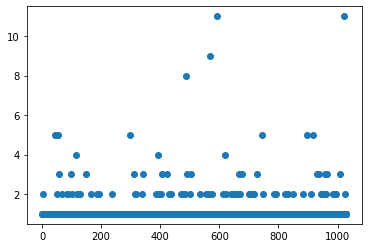

In [29]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

Видим пользователей с 1-4 заказами. Все что больше похоже на выбросы. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
Посчитаем выборочные перцентили количества заказов на одного пользователя:

#### 7. Найдем 95-й и 99-й перцентили количества заказов на пользователя.

In [30]:
orders_perc_95 = np.percentile(ordersByUsers['orders'], 95)
orders_perc_99 = np.percentile(ordersByUsers['orders'], 99)
print('95 перцентиль:', orders_perc_95,'99 перцентиль:', orders_perc_99)

95 перцентиль: 2.0 99 перцентиль: 4.0


Не более 5% пользователей оформляли больше чем 2 заказа.  И не более 1% пользователей - больше четырех заказов.  

#### 8.	Точечный график стоимостей заказов методом scatter()

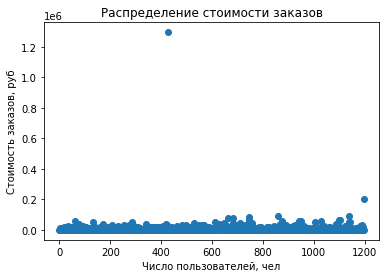

In [31]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.title('Распределение стоимости заказов')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Стоимость заказов, руб')

plt.show()

На графике отчетливо видны 2 выброса - это наиболее крупные заказы, которые влияют на наши графики

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

+

</div>

Найдем выбросы, которые так повлияли на наши графики

In [32]:
# находим min, max и медиану в столбце revenue
print('Минимальная выручка с заказа ', orders['revenue'].min()\
      , 'Максимальная выручка с заказа ', orders['revenue'].max()\
      , 'Медиана выручки с заказа ', orders['revenue'].median())

Минимальная выручка с заказа  50 Максимальная выручка с заказа  1294500 Медиана выручки с заказа  2978.0


In [33]:
# Определим, когда был сделан заказ с максимальной стоимостью:
orders.sort_values(by = 'revenue', ascending = False).head()

,orderId,userId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Итак, заказ стоимостью 1 294 500 руб. был сделан 19 августа, что мы и видим на всех графиках. Именно этот заказ внес искажения в графики.

Теперь можем построить более наглядный график распределения стоимости заказа без влияния выбросов:

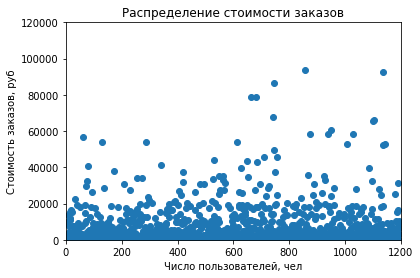

In [34]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.title('Распределение стоимости заказов')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Стоимость заказов, руб')
plt.axis([0, 1200, 0, 120000])

plt.show()

Заказов стоимостью 40 000 - 60 000 немного. Есть несколько заказов в  районе 60 000-100 000 руб.

<div style="border:solid red 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ошибка**

Ты не показала главнй выброс, который внес искажения на все графики
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Нашла главный выброс.</div>

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера - 2**

**#ок**

Все верно

</div>

#### 9.	Найдем 95-й и 99-й перцентили стоимости заказов.

In [35]:
check_perc_95 = np.percentile(orders['revenue'], 95).round(2)
check_perc_99 = np.percentile(orders['revenue'], 99).round(2)
print('95 перцентиль:', check_perc_95,'99 перцентиль:', check_perc_99)

95 перцентиль: 28000.0 99 перцентиль: 58233.2


Не более, чем у 1% заказов чек дороже 58233 руб. И не более чем у 5% заказов чек стоимостью 28000 руб.

**Вывод**  

На данном этапе мы нашли аномалии по количеству заказов и среднему чеку.
Определили, что не более 5% пользователей оформляли больше чем 2 заказа.  И не более 1% пользователей - больше четырех заказов.  
Посчитали 95-й и 99-й перцентили стоимости заказов. Не более, чем у 5% заказов чек дороже 28000. И не больше, чем у 1% заказов чек дороже 58233 т.р.  

Для отсечения аномальных пользователей примем 99 процентиль. 
Так мы уберём 1% пользователей с наибольшим числом заказов и 1% заказов с наибольшей стоимостью.

<div style="border:solid gold 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#можно лучше**

Здесь стоило в итоге написать какой именно уровень мы выбрали для фильтрации аномалий

Использовать 95% перцентиль для отсечения выбросов - возможный вариант. Но в данном случае лучше использовать 99% перцентиль. Мы фильтруем по двум параметрам. А значит при последовательном отсечении 5%, мы отбросим больше 5%, а это не очень хорошо.       
    
</div>

#### 10.	Статистическая значимость различий в конверсии между группами по «сырым» данным. 

Подготовим данные. Добавим информацию о посещениях в день и о кумулятивном количестве посещений.

In [36]:
# В переменных visitsA и visitsB сохраним количество пользователей в выбранную дату по группам:
visitsA,visitsB = visitors.query('group == "A"'),visitors.query('group == "B"')

In [37]:
# В переменных ordersA и ordersB сохраним количество заказов для каждого уникального пользовтаеля:
ordersA = orders.query('group == "A"')\
    .groupby('userId', as_index = False).agg({'orderId' : 'nunique', 'revenue' : 'sum'}).rename(columns = {'orderId' : 'orders'})
ordersB = orders.query('group == "B"')\
    .groupby('userId',as_index = False).agg({'orderId' : 'nunique', 'revenue' : 'sum'}).rename(columns = {'orderId' : 'orders'})

Чтобы подготовить выборки к проверке критерием Манна-Уитни, объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Их количество равно разнице между суммой посетителей и количеством записей о заказах: visitsA['visitors'].sum() - ordersA.shape[0]

In [38]:
sampleA = ordersA['orders'].append(pd.Series([0] * (visitsA['visitors']\
                                                    .sum() - ordersA.shape[0]), name = 'orders'))
sampleB = ordersB['orders'].append(pd.Series([0] * (visitsB['visitors']\
                                                    .sum() - ordersB.shape[0]), name = 'orders'))

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.  

Сформулируем гипотезы.  

* Н0: различий в конверсии между группами по сырым данным нет. 
* Н1: различия в конверсии между группами по сырым данным есть.

Пороговое значение alpha примем за 5%.

In [39]:
# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. 
print("P-value конверсии до очистки данных: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

P-value конверсии до очистки данных: 0.017


Чтобы найти относительный прирост конверсии группы B к группе A, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean(). Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [40]:
print("Относительный прирост конверсии группы B к конверсии группы А до очистки данных: {0:.3f}"\
      .format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост конверсии группы B к конверсии группы А до очистки данных: 0.138


**Вывод**   
По «сырым» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем.  
Относительный прирост конверсии группы B к конверсии группы А равен 13%.

#### 11.	Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сравним средние чеки по "сырым" данным.  
Сформулируем гипотезы:  

* Н0 : статистически значимых различий в среднем чеке между группами по сырым данным нет.   
* Н1: статистически значимые различия в среднем чеке между группами по сырым данным есть.  
Пороговое значение alpha примем за 5%.

In [41]:
# Для рассчета статистической значимости различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов:
print('P-value по среднему чеку до очистки данных: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# Найдём относительные различия в среднем чеке между группами:
print('Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value по среднему чеку до очистки данных: 0.729
Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных: 0.259


**Вывод:**  
По «сырым» данным различий в среднем чеке групп A и B нет: p-value = 0.729, и это больше 0.05.  
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке  между группами нет, мы не можем отвергнуть.
Относительный выигрыш среднего чека группы B к среднему чеку группы А равен 25,9 %.

#### 12. Статистическая значимость различий в конверсии между группами по «очищенным» данным. 

В предыдыдущем шаге мы определили, что

95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям.  
95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на 1 пользователя.  

Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 58 233 рублей.

Так мы уберём 1% пользователей с наибольшим числом заказов и 1% заказов с наибольшей стоимостью.

Сделаем срезы пользователей с числом заказов 4 и более — many_orders и пользователей, совершивших заказы дороже 58 233 — expensive_orders.

In [42]:
# Для отсечения аномальных пользователей возьмем срез пользователей с числом заказов больше 4:

many_orders = pd.concat(
    [
        ordersA[ordersA['orders'] > orders_perc_99]['userId'],
        ordersB[ordersB['orders'] > orders_perc_99]['userId'],
    ],
    axis=0,
)

# Для отсечения аномально дорогих заказов возбмем срезы заказов дороже 58 233 — expensive_orders.
expensive_orders = orders[orders['revenue'] > check_perc_99]['userId']

# В переменной anomalies объединим все аномалии:
anomalies = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(anomalies.head())
print(anomalies.shape) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: userId, dtype: int64
(15,)


Всего 15 аномальных пользователей.


Узнаем, как действия аномальных пользователей повлияли на результаты теста.  
Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.  
Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [43]:
sampleAClean = pd.concat(
    [
        ordersA[
            np.logical_not(ordersA['userId'].isin(anomalies))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitsA['visitors'].sum() - len(ordersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBClean = pd.concat(
    [
        ordersB[
            np.logical_not(ordersB['userId'].isin(anomalies))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitsB['visitors'].sum() - len(ordersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [44]:
print('P-value конверсии после очистки данных: {0:.3f}'\
      .format(stats.mannwhitneyu(sampleAClean, sampleBClean)[1]))
print('Относительный прирост конверсии группы B к конверсии группы А после очистки данных: {0:.3f}'\
      .format(sampleBClean.mean()/sampleAClean.mean()-1)) 

P-value конверсии после очистки данных: 0.014
Относительный прирост конверсии группы B к конверсии группы А после очистки данных: 0.153


**Вывод**  
По «очищенным» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.014 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем.  
Относительный прирост конверсии группы B к конверсии группы А равен 15.3%.
После очистки данные конверсии группы B улучшилась относительно группы А.

#### 13.	Статистичкая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [45]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(anomalies)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(anomalies)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(anomalies)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(anomalies)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.851
-0.006


**Вывод:**  
По «очищенным» данным различий в среднем чеке групп A и B нет: p-value = 0.851, и это больше 0.05.
Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, мы не можем отвергнуть. Относительный проигрыш среднего чека группы B к среднему чеку группы А равен 0,6 %.
P-value увеличился, но и разница между сегментами сократилась с 25,9% до 0,6 %

<div style="border:solid green 2px; padding: 20px"> 
    
**Комментарий ревьюера**

**#ок**

Гипотезы сформулированы и проверены правильно, молодец.

</div>

#### 14.	Решение по результатам теста.  

Имеющиеся факты:  

**Конверсия:**  
•	Есть статистически значимое различие по конверсии между группами и по «сырым», и по "чистым" данным после отсеянных аномалий;  
•	Относительный прирост конверсии группы B к группе А 13,8% по "сырым данным" увеличился после очистки до 15.3%.  
•	График различия конверсии между группами сообщает, что результаты группы B лучше группы A 

**Средний чек**  
•	Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий   
•	Относительный выигрыш среднего чека группы B к группе А  по "сырым данным" 25%, а после очистки от аномалий, разрыв между группами сократился до 0,6%.   
•	График различия среднего чека между группами сообщает, что на результаты группы B влияют аномалии.

**Общий вывод**  

Так как задача заключается в увеличении выручки, приоритетной метрикой будем считать конверсию - она влияет на выручку. 
Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В. Группа B статистически значимо лучше группы A по метрике конверсии, но различий в средних чеках нет.

<div style="border:solid green 2px; padding: 20px"> 

**Общий комментарий по проекту**

Ты хорошо поработала над проектом, молодец. Ты сделала отличный самостоятельный анализ
    
Поправь небольшую неточность, чтобы я могла принять проект.
    
Удачи.
</div>